In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
countries = pd.read_csv('./../../data/c_table.csv')[['Country or area', 'ISO3166-1-Alpha-2']]
name_mapper = countries.set_index('ISO3166-1-Alpha-2').to_dict()['Country or area']
name_mapper['US'] ='United States'; name_mapper['GB']='United Kingdom'

In [3]:
###

# Bernard and moxnes
# Firm sales/number of buyers

# Pareto by country for hypothesis on G/g

## Bilateral effects

In [5]:
df = pd.read_csv('./../../data/processed/_FBCP.csv')

firm_sizes = df.groupby(['IMPORT', 'ID', 'PERIOD'])['VART'].sum().reset_index()
df = df.merge(firm_sizes, on = ['IMPORT', 'PERIOD', 'ID'])
df['log_size'] = np.log10(df.VART_y)
# Keep exports
df = df.loc[df.IMPORT == 0].drop('IMPORT', axis = 1)

In [6]:
# Aggregate products out:
df = df.groupby(['ID','PYOD','VAT','PERIOD'])['VART_x'].sum().reset_index()

In [7]:
df.head()

,ID,PYOD,VAT,PERIOD,VART_x
0,0,AD,AD,2,524091.0
1,0,AE,AE,2,1213305.5
2,0,AF,AF,2,6150.0
3,0,AL,AL,2,13150.0
4,0,AM,AM,2,3950.0


In [8]:
k1_fij = pd.DataFrame(df.groupby(['PYOD', 'PERIOD'])['VART_x'].sum()/df.groupby(['PYOD', 'PERIOD'])['VAT'].nunique(),
                      columns = ['k1_fFRj']).reset_index()

In [9]:

k1_fij['Country'] = k1_fij['PYOD'].map(name_mapper).fillna('_Others')

In [10]:
k1_fij.sample(60).sort_values(by = 'k1_fFRj')

,PYOD,PERIOD,k1_fFRj,Country
123,LV,2,1.848245e+05,Latvia
168,PW,2,2.084725e+05,Palau
20,BG,2,2.377116e+05,Bulgaria
12,AT,2,3.345929e+05,Austria
137,MS,2,3.508553e+05,Montserrat
81,GR,2,3.641491e+05,Greece
66,FI,2,4.037809e+05,Finland
185,SI,2,4.336929e+05,Slovenia
93,IE,2,4.607130e+05,Ireland
72,GB,2,8.055965e+05,United Kingdom


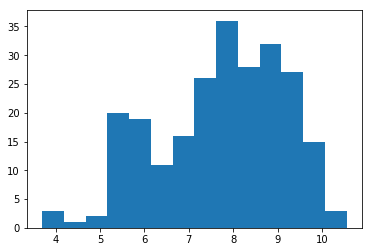

In [11]:
plt.hist(np.log10(k1_fij.k1_fFRj), 14)
plt.show()

## Buyer and seller pareto fits

In [4]:
df = pd.read_csv('./../../data/processed/_FBCP.csv')

seller_size = df.groupby(['PYOD', 'PERIOD', 'ID'])[['VART']].sum()
buyer_size = df.groupby(['PYOD', 'PERIOD', 'VAT'])[['VART']].sum()

In [5]:
EU_ctries = df.groupby('PYOD')['VAT'].nunique().sort_values().tail(26).index

seller_TOTsize = df.loc[df.PYOD.isin(EU_ctries)].groupby(['PERIOD', 'ID'])[['VART']].sum()


In [1]:
# x = np.arange(3, 8, .2)

# fig, axs = plt.subplots(1, 2, figsize = (16, 5))

# # Line of the total
# sizes = seller_TOTsize
# sizes = pd.DataFrame(np.log10(sizes.loc[2])).rename(columns = {'VART': 'log_size'})

# cdf = []
# for th in x:
#     cdf += [1 - (sizes > th).sum()/len(sizes)]
# cdf = np.array(cdf).flatten()
# y = np.log10(1 - cdf)
# ax = axs[0]
# ax.plot(x, y, color = 'k')

# for i in range(2):
#     ax = axs[i]
#     for ctry in EU_ctries:
#         sizes = [seller_size, buyer_size][i]
#         sizes = pd.DataFrame(np.log10(sizes.loc[ctry].loc[2])).rename(columns = {'VART': 'log_size'})

#         if len(sizes) > 10:
#             cdf = []
#             for th in x:
#                 cdf += [1 - (sizes > th).sum()/len(sizes)]
#             cdf = np.array(cdf).flatten()

#             # For what matters, we could just fit a linear in the upper 90% of firms and drop the SMEs. The we would have a pareto/zipf
#             y = np.log10(1 - cdf)

#             ax.plot(x, y, label = ctry, linestyle = '-', lw = .75)

#             ax.set_ylim(-4, 0)
#             ax.set_xlim(3, 8)
#             ax.set_xlabel('Exporter size (log)', fontsize = 13)
#             ax.set_ylabel('log(1 - CDF)', fontsize = 13)
#     #         ax.legend(loc = (.1, .1))

#             # plt.savefig('./../../../thesis_writing/figures/pareto_option.png', dpi = 400)
# plt.show()


In [53]:
seller_size

VART
PYOD PERIOD ID                     
AD   2      0          6.643000e+05
            3102       4.927133e+04
            10578      2.462000e+04
            19314      1.109045e+05
            55284      8.409000e+03
            72487      1.191000e+03
            72883      1.035000e+04
            5720784    1.577000e+03
            15752595   2.300867e+04
            15753981   9.289000e+03
            15851793   9.794000e+03
            15871023   1.433000e+04
            16250102   4.522000e+03
            16650996   4.868200e+04
            16750507   5.285000e+03
            26450072   2.389350e+04
            27080225   3.971000e+03
            27250026   1.056412e+06
            27320134   3.476500e+04
            35721091   1.184540e+04
            36020709   3.866000e+04
            45880473   4.642000e+03
            54800958   1.750900e+04
            54803622   1.787000e+03
            55200323   5.692000e+03
            55501902   4.438917e+05
            55801278   1.096000e+03
            55805865   3.126820e+04
            56502958   1.671670e+05
            56800659   1.534000e+04
...                             ...
ZW   2      775610504  4.069000e+03
            775653710  4.562000e+03
            775662257  2.621575e+05
            775672272  1.461060e+05
            775708225  7.877650e+05
            777344334  1.293000e+03
            777777777  1.122700e+04
            780054334  3.000000e+03
            780108841  5.032700e+04
            781202940  4.400000e+03
            785085515  9.972000e+03
            785447467  2.410300e+04
            789238573  1.318000e+03
            796880235  1.800000e+03
            837150366  3.631700e+04
            857200521  1.954645e+05
            888888888  9.237557e+05
            905420014  5.233550e+04
            905620035  1.357600e+04
            915620876  1.500000e+03
            945451144  1.367900e+04
            945551596  1.200000e+03
            945650240  9.457300e+04
            945753002  1.978180e+05
            946750650  1.881100e+04
            954506077  1.039365e+05
            955509153  7.738451e+06
            955802061  2.715080e+05
            971506191  8.430550e+04
            999999999  6.638631e+05

[1571725 rows x 1 columns]

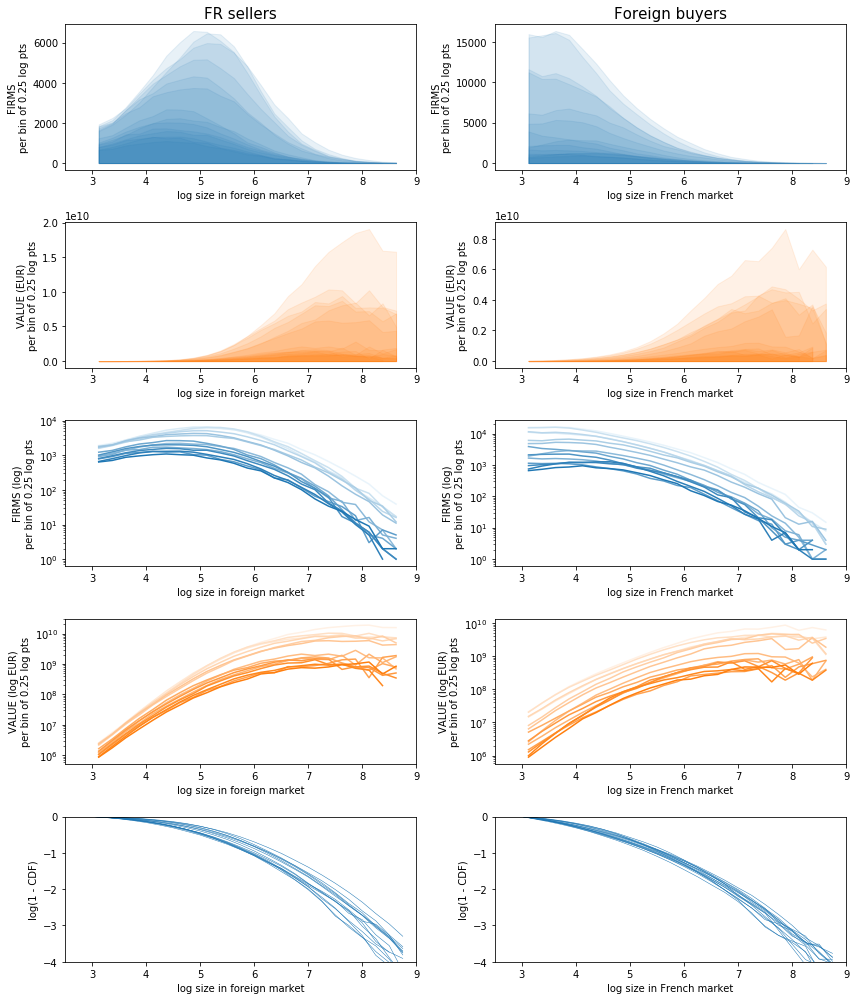

In [61]:
from matplotlib.colors import ListedColormap

bin_w = .25
x = np.arange(3, 9, bin_w)

fig, axs = plt.subplots(5, 2, figsize = (12, 14))


# # Line of the total
# sizes = seller_TOTsize
# sizes = pd.DataFrame(np.log10(sizes.loc[2])).rename(columns = {'VART': 'log_size'})
# ax = axs[0]
# ax.plot(x, y, color = 'k')

# Pick larger 10 countries
ctries_sorted = seller_size.loc[EU_ctries].groupby(level = 0)['VART'].sum().sort_values(ascending = False).head(14).index.values
# ctries_sorted = seller_size.groupby(level = 0)['VART'].sum().sort_values(ascending = False).head(10).index.values
# ctries = np.random.choice(EU_ctries, 10, replace = False)

for i in range(2):

    for j, ctry in enumerate(ctries_sorted):
        side = [seller_size, buyer_size][i]
        slice_ = side.loc[ctry].loc[2]

        # sizes. #Not log, so it can be filled to y = 0
        hist = slice_.groupby(pd.cut(np.log10(slice_.VART), x))['VART'].agg(['count', 'sum'])
        hist = hist.loc[hist['count'].values > 0]
        
        
        # HISTOGRAMS (linear y)
        for k, measure in enumerate(['count', 'sum']):
            ax = axs[k][i]
            if k == 0: ax.set_title(['FR sellers', 'Foreign buyers'][i], fontsize = 15)
            color = ['#1f77b4', '#ff7f0e'][k]
            x_ = [b.mid for b in hist.index]
            ax.fill_between(x_, hist[measure], 0, alpha = .1, color = color)
            ax.set_xlabel(['log size in foreign market', 'log size in French market'][i])
            ax.set_ylabel(['FIRMS', 'VALUE (EUR)'][k]+'\nper bin of '+str(bin_w)+' log pts')
            ax.set_xlim(2.5, 9)
            
        # Logplot of PDF                
        for k, measure in enumerate(['count', 'sum']):
            ax = axs[k + 2][i]
            color = ['#1f77b4', '#ff7f0e'][k]
            color_j = sns.light_palette(color, len(ctries_sorted)).as_hex()[j]
            x_ = [b.mid for b in hist.index]
            ax.plot(x_, hist[measure], color = color_j)
            ax.set_yscale('log')
            ax.set_xlabel(['log size in foreign market', 'log size in French market'][i])
            ax.set_ylabel(['FIRMS (log)', 'VALUE (log EUR)'][k]+'\nper bin of '+str(bin_w)+' log pts')
            ax.set_xlim(2.5, 9)
            
            
        sizes = pd.DataFrame(np.log10(slice_)).rename(columns = {'VART': 'log_size'})
        # Log (1-CDF), Pareto plot
        ax = axs[4][i]
        cdf = []
        for th in x:
            cdf += [1 - (sizes > th).sum()/len(sizes)]
        cdf = np.array(cdf).flatten()
        # For what matters, we could just fit a linear in the upper 90% of firms and drop the SMEs. The we would have a pareto/zipf
        y = np.log10(1 - cdf)
        ax.plot(x, y, label = ctry, linestyle = '-', lw = .5, color = '#1f77b4')
        ax.set_ylim(-4, 0)
        ax.set_xlim(2.5, 9)
        ax.set_xlabel(['log size in foreign market', 'log size in French market'][i])
        ax.set_ylabel('log(1 - CDF)')#, fontsize = 13)
    
plt.tight_layout()
plt.savefig('./../../../thesis_writing/figures/bilateral_size_dists.png', bbox_inches='tight')
plt.show()


## Bernard Margins

In [23]:
df = pd.read_csv('./../../data/processed/_FBCP.csv')

firm_sizes = df.groupby(['IMPORT', 'ID', 'PERIOD'])['VART'].sum().reset_index()
df = df.merge(firm_sizes, on = ['IMPORT', 'PERIOD', 'ID'])
df['log_size'] = np.log10(df.VART_y)
# Keep exports
df = df.loc[df.IMPORT == 0].drop('IMPORT', axis = 1)

In [24]:
grouped = df.groupby(['ID', 'PERIOD'])

n_prods = grouped['CN ID 4'].nunique()
n_vats = grouped['VAT'].nunique()
n_cases = grouped.count().log_size

In [25]:
data = grouped.first().drop(['CN ID 4','PYOD','VAT','VART_x'], axis = 1)

In [26]:
data['n_prods'] = n_prods
data['n_vats'] = n_vats
data['n_cases'] = n_cases

data['density'] = n_cases/(n_prods*n_vats)
data['x_mean'] = data.VART_y/n_cases